In [123]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
data = pd.read_csv("/content/drive/MyDrive/data_YesBank_StockPrices.csv")
data

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


In [124]:
# To get the number of rows:
num_rows = data.shape[0]

# To get the number of columns:
num_columns = data.shape[1]

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 185
Number of columns: 5


In [125]:
#Dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [126]:
# To count the number of duplicate values in the DataFrame:
num_duplicates = data.duplicated().sum()
print("Number of duplicate rows in the dataset:", num_duplicates)

# Missing Values/Null Values Count
missing_values_count = data.isnull().sum()
print("Missing values count in each column:")
print(missing_values_count)

# Dataset Describe
# To get the descriptive statistics of the DataFrame:
description = data.describe()
print(description)

# Handling Outliers & Outlier treatments
# Handling Outliers
# Calculate the Z-scores for 'Close' column
z_scores = (data['Close'] - data['Close'].mean()) / data['Close'].std()
# Define a Z-score threshold to identify outliers
z_score_threshold = 3
# Detect outliers by filtering rows with Z-scores greater than the threshold
outliers = data[abs(z_scores) > z_score_threshold]
#Outlier treatment
# you can remove the outliers from the DataFrame or cap them to a specific value
# For example, to remove outliers:
data = data[abs(z_scores) <= z_score_threshold]

# To cap outliers at a specific value (e.g., at the mean of the 'Close' column):
mean_close = data['Close'].mean()
data['Close'] = data['Close'].apply(lambda x: mean_close if abs((x - mean_close) / data['Close'].std()) > z_score_threshold else x)
data




Number of duplicate rows in the dataset: 0
Missing values count in each column:
Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64
             Open        High         Low       Close
count  185.000000  185.000000  185.000000  185.000000
mean   105.541405  116.104324   94.947838  105.204703
std     98.879850  106.333497   91.219415   98.583153
min     10.000000   11.240000    5.550000    9.980000
25%     33.800000   36.140000   28.510000   33.450000
50%     62.980000   72.550000   58.000000   62.540000
75%    153.000000  169.190000  138.350000  153.300000
max    369.950000  404.000000  345.500000  367.900000


,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


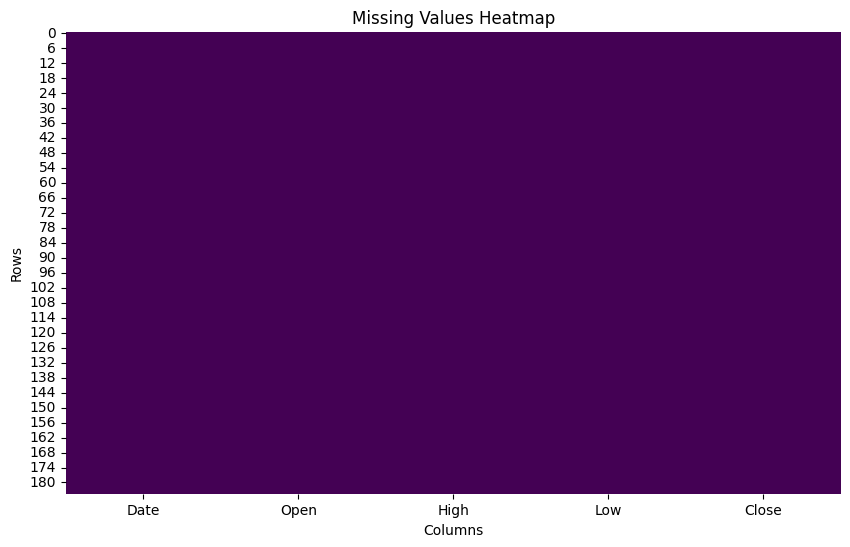

In [127]:
# Visualizing the missing values
import matplotlib.pyplot as plt
import seaborn as sns
# Create a heatmap to visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()

In [128]:
#Unique value for each column
for column in data.columns:
  unique_values= data[column].unique()
  print(f"Unique values for column '{column}':")
  print(unique_values)
  print('\n')


Unique values for column 'Date':
['Jul-05' 'Aug-05' 'Sep-05' 'Oct-05' 'Nov-05' 'Dec-05' 'Jan-06' 'Feb-06'
 'Mar-06' 'Apr-06' 'May-06' 'Jun-06' 'Jul-06' 'Aug-06' 'Sep-06' 'Oct-06'
 'Nov-06' 'Dec-06' 'Jan-07' 'Feb-07' 'Mar-07' 'Apr-07' 'May-07' 'Jun-07'
 'Jul-07' 'Aug-07' 'Sep-07' 'Oct-07' 'Nov-07' 'Dec-07' 'Jan-08' 'Feb-08'
 'Mar-08' 'Apr-08' 'May-08' 'Jun-08' 'Jul-08' 'Aug-08' 'Sep-08' 'Oct-08'
 'Nov-08' 'Dec-08' 'Jan-09' 'Feb-09' 'Mar-09' 'Apr-09' 'May-09' 'Jun-09'
 'Jul-09' 'Aug-09' 'Sep-09' 'Oct-09' 'Nov-09' 'Dec-09' 'Jan-10' 'Feb-10'
 'Mar-10' 'Apr-10' 'May-10' 'Jun-10' 'Jul-10' 'Aug-10' 'Sep-10' 'Oct-10'
 'Nov-10' 'Dec-10' 'Jan-11' 'Feb-11' 'Mar-11' 'Apr-11' 'May-11' 'Jun-11'
 'Jul-11' 'Aug-11' 'Sep-11' 'Oct-11' 'Nov-11' 'Dec-11' 'Jan-12' 'Feb-12'
 'Mar-12' 'Apr-12' 'May-12' 'Jun-12' 'Jul-12' 'Aug-12' 'Sep-12' 'Oct-12'
 'Nov-12' 'Dec-12' 'Jan-13' 'Feb-13' 'Mar-13' 'Apr-13' 'May-13' 'Jun-13'
 'Jul-13' 'Aug-13' 'Sep-13' 'Oct-13' 'Nov-13' 'Dec-13' 'Jan-14' 'Feb-14'
 'Mar-14' 'Apr-14'

In [129]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Extract features and target
X = data[["Open", "High", "Low"]]
y = data["Close"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree regressor
regressor = DecisionTreeRegressor(max_depth=5)  # You can adjust hyperparameters

# Train the regressor on the training data
regressor.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = regressor.predict(X_test)

# Evaluate the model using mean squared error
# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared Score: {r2}")



# Predict the Close price for a new data point
new_data = pd.DataFrame({
    "Open": [12.41],
    "High": [14.9],
    "Low": [12.21]
})

predicted_close = regressor.predict(new_data)
print(f"Predicted Close Price: {predicted_close[0]}")


Mean Squared Error: 233.31310558909252
Mean Absolute Error: 9.719067996567997
R-squared Score: 0.9741876967343271
Predicted Close Price: 12.935


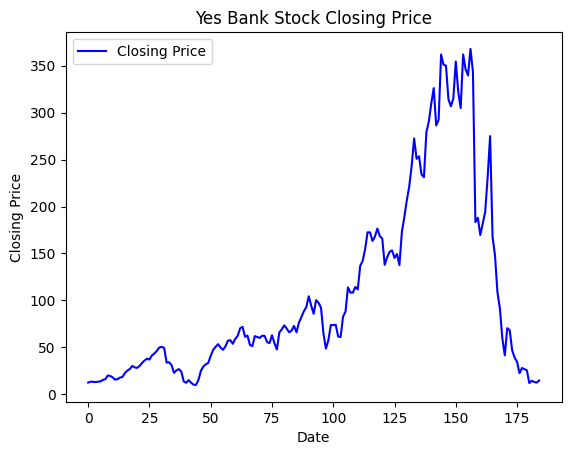

In [130]:
# Plot the closing price over time
plt.plot(data.index, data['Close'], label='Closing Price', color='blue')
plt.title('Yes Bank Stock Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

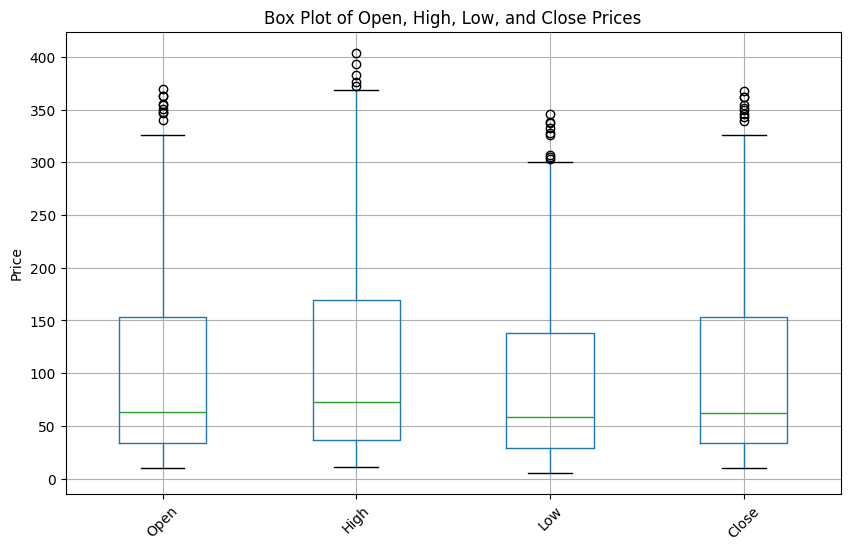

In [131]:
# Create a DataFrame for selected columns
selected_columns = ["Open", "High", "Low", "Close"]
selected_data = data[selected_columns]

# Create a box plot for selected columns
plt.figure(figsize=(10, 6))
selected_data.boxplot()
plt.title("Box Plot of Open, High, Low, and Close Prices")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

<ipython-input-132-94667d017c2e>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1, bins=10, kde=True, rug=True)


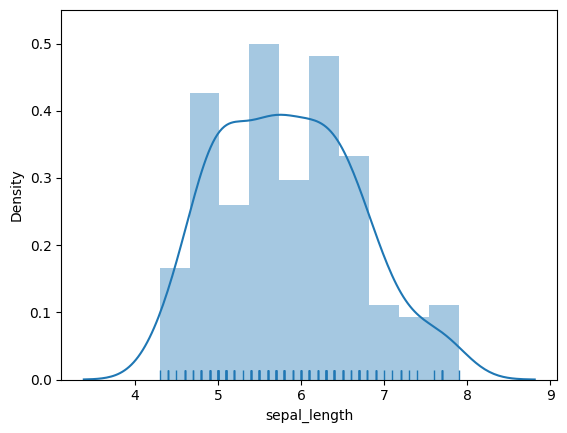

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt
data1 = data.copy()
# Create a random dataset
data1 = sns.load_dataset("iris")["sepal_length"]

# Create a distplot
sns.distplot(data1, bins=10, kde=True, rug=True)

# Display the plot
plt.show()


# New Section

In [133]:
data


,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


In [136]:
#fit the model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%b-%y')


# Separate the target variable 'Close' from the features
X = data.drop(columns=['Close'])  # Features
y = data['Close']  # Target variable

# Split the data into training and test sets (80-20 split ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Support Vector Regression model
model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Support Vector Regression Model Performance:")
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Prediction:",y_pred)



TypeError: ignored